In [11]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [13]:
print(train_images.shape[1:])

(28, 28)


In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [14]:

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')


In [15]:
#scaling the data
train_data /=255.0
test_data /=255.0

In [16]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [17]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 1.0805 - accuracy: 0.6726 - val_loss: 0.6010 - val_accuracy: 0.8091
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.4493 - accuracy: 0.8661 - val_loss: 0.4057 - val_accuracy: 0.8744
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3494 - accuracy: 0.8971 - val_loss: 0.3391 - val_accuracy: 0.8994
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2999 - accuracy: 0.9125 - val_loss: 0.2891 - val_accuracy: 0.9122
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.2618 - accuracy: 0.9225 - val_loss: 0.2579 - val_accuracy: 0.9222
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2302 - accuracy: 0.9315 - val_loss: 0.2325 - val_accuracy: 0.9299
Epoch 7/10
60000/60000 [==============================] - 5s 87us/s

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


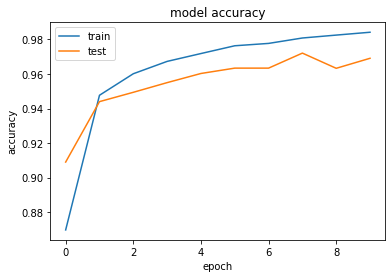

In [11]:
# Accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

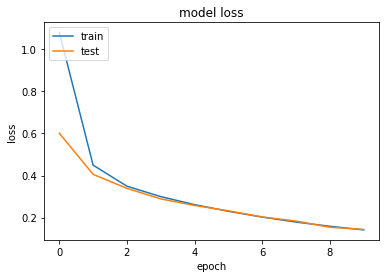

In [20]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


10000/10000 [==============================] - 1s 63us/step
Evaluation result on Test Data : Loss = 0.14412049701064825, accuracy = 0.9559999704360962


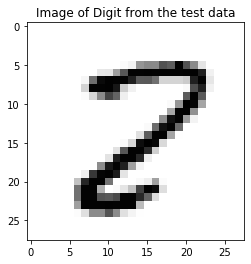

In [21]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 444
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Image of Digit from the test data")
plt.show()

In [22]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())
print(history.history.keys())

Predicted digit: 2
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
